## 关键词提取

- 说明
  * 内部采用`TextRankKeyword`实现，用户可以直接调用`TextRankKeyword.getKeywordList(document, size)`
- 算法详解
  * [《TextRank算法提取关键词的Java实现》](http://www.hankcs.com/nlp/textrank-algorithm-to-extract-the-keywords-java-implementation.html)
  
## 部分内容如下

谈起自动摘要算法，常见的并且最易实现的当属TF-IDF，但是感觉TF-IDF效果一般，不如TextRank好。

TextRank是在Google的PageRank算法启发下，针对文本里的句子设计的权重算法，目标是自动摘要。它利用投票的原理，让每一个单词给它的邻居（术语称窗口）投赞成票，票的权重取决于自己的票数。这是一个“先有鸡还是先有蛋”的悖论，PageRank采用矩阵迭代收敛的方式解决了这个悖论。TextRank也不例外：

**PageRank的计算公式：**

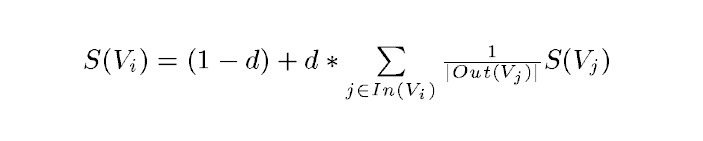

**正规的TextRank公式**

正规的TextRank公式在PageRank的公式的基础上，引入了边的权值的概念，代表两个句子的相似度：

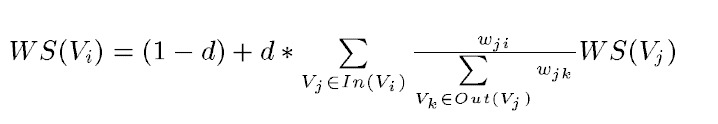

但是很明显我只想计算关键字，如果把一个单词视为一个句子的话，那么所有句子（单词）构成的边的权重都是0（没有交集，没有相似性），所以分子分母的权值w约掉了，算法退化为PageRank。所以说，这里称关键字提取算法为PageRank也不为过。

另外，如果你想提取关键句（自动摘要）的话，请参考姊妹篇《TextRank算法自动摘要的Java实现》。

### pyhanlp中的使用方法如下

In [1]:
from pyhanlp import *# 关键词提取
content = (
    "程序员(英文Programmer)是从事程序开发、维护的专业人员。"
    "一般将程序员分为程序设计人员和程序编码人员，"
    "但两者的界限并不非常清楚，特别是在中国。"
    "软件从业人员分为初级程序员、高级程序员、系统"
    "分析员和项目经理四大类。")
TextRankKeyword = JClass("com.hankcs.hanlp.summary.TextRankKeyword")
keyword_list = HanLP.extractKeyword(content, 5)
print(keyword_list)

# 新词识别，此处没什么用，文本太短。之后会在案例中使用
# newword_list = HanLP.extractWords(content, 5)
# print(newword_list)

[程序员, 人员, 程序, 分为, 开发]


## 自动摘要

- 说明
  * 内部采用`TextRankSentence`实现，用户可以直接调用`TextRankSentence.getTopSentenceList(document, size)`。
- 算法详解
  * [《TextRank算法自动摘要的Java实现》](http://www.hankcs.com/nlp/textrank-algorithm-java-implementation-of-automatic-abstract.html)


## 原文部分内容
所谓自动摘要，就是从文章中自动抽取关键句。何谓关键句？人类的理解是能够概括文章中心的句子，机器的理解只能模拟人类的理解，即拟定一个权重的评分标准，给每个句子打分，之后给出排名靠前的几个句子。

**TextRank公式**

TextRank的打分思想依然是从PageRank的迭代思想衍生过来的，如下公式所示：

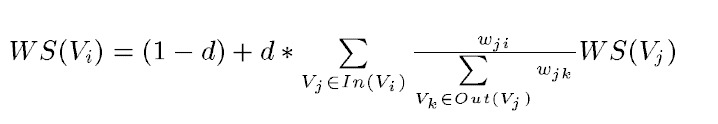


等式左边表示一个句子的权重（WS是weight_sum的缩写），右侧的求和表示每个相邻句子对本句子的贡献程度。与提取关键字的时候不同，一般认为全部句子都是相邻的，不再提取窗口。

求和的分母wji表示两个句子的相似程度，分母又是一个weight_sum，而WS(Vj)代表上次迭代j的权重。整个公式是一个迭代的过程。

**相似程度的计算**

而相似程度wji的计算，推荐使用BM25

BM25算法，通常用来作搜索相关性平分。一句话概况其主要思想：对Query进行语素解析，生成语素qi；然后，对于每个搜索结果D，计算每个语素qi与D的相关性得分，最后，将qi相对于D的相关性得分进行加权求和，从而得到Query与D的相关性得分。

[BM25算法pdf](http://www.hankcs.com/wp-content/uploads/2017/01/BM25%E7%AE%97%E6%B3%95.pdf)


### pyhanlp中使用自动摘要

In [2]:
# 自动摘要

document = '''水利部水资源司司长陈明忠9月29日在国务院新闻办举行的新闻发布会上透露，
    根据刚刚完成了水资源管理制度的考核，有部分省接近了红线的指标，
    有部分省超过红线的指标。对一些超过红线的地方，陈明忠表示，对一些取用水项目进行区域的限批，
    严格地进行水资源论证和取水许可的批准。
     '''

TextRankSentence = JClass("com.hankcs.hanlp.summary.TextRankSentence")
sentence_list = HanLP.extractSummary(document, 3)
print(sentence_list)

sentence_list = HanLP.extractSummary(document, 2)
print(sentence_list)

sentence_list = HanLP.extractSummary(document, 1)
print(sentence_list)

sentence_list = HanLP.getSummary(document, 50)
print(sentence_list)

sentence_list = HanLP.getSummary(document, 30)
print(sentence_list)

sentence_list = HanLP.getSummary(document, 20)
print(sentence_list)

[严格地进行水资源论证和取水许可的批准, 有部分省超过红线的指标, 水利部水资源司司长陈明忠9月29日在国务院新闻办举行的新闻发布会上透露]
[严格地进行水资源论证和取水许可的批准, 有部分省超过红线的指标]
[严格地进行水资源论证和取水许可的批准]
水利部水资源司司长陈明忠9月29日在国务院新闻办举行的新闻发布会上透露。有部分省超过红线的指标。
有部分省超过红线的指标。严格地进行水资源论证和取水许可的批准。
有部分省超过红线的指标。
